## Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import os
import json
import webbrowser
import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.max_columns', None)

# 1-Gathering

## Downloading `image_predictions.tsv` programmatically

In [3]:
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)
with open ("image_predictions.tsv", mode = 'wb') as file:
    file.write(response.content)

### 1.Opening `twitter-archive-enhanced.csv` and reading it into the DataFrame `df_1`

In [4]:
df_1 = pd.read_csv("twitter-archive-enhanced.csv")

### 2.Opening `image_predictions.tsv` and reading it into the DataFrame `df_2`

In [5]:
df_2 = pd.read_csv("image_predictions.tsv", delimiter= "\t")

### 3.Using tweepy to gather data into `tweet_json.txt`
- This part is copied because twitter did not accept my developer account application.


In [6]:
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df_1.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

1: 892420643555336193
Fail
2: 892177421306343426
Fail
3: 891815181378084864
Fail
4: 891689557279858688
Fail
5: 891327558926688256
ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

Traceback (most recent call last):
  File "C:\Users\ossam\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\interactiveshell.py", line 3418, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-6-8723d8f2c4bc>", line 38, in <module>
    tweet = api.get_status(tweet_id, tweet_mode='extended')
  File "C:\Users\ossam\AppData\Local\Programs\Python\Python39\lib\site-packages\tweepy\binder.py", line 253, in _call
    return method.execute()
  File "C:\Users\ossam\AppData\Local\Programs\Python\Python39\lib\site-packages\tweepy\binder.py", line 184, in execute
    resp = self.session.request(self.method,
  File "C:\Users\ossam\AppData\Local\Programs\Python\Python39\lib\site-packages\requests\sessions.py", l

TypeError: object of type 'NoneType' has no len()

### reading `tweet_json.txt` into the DataFrame `df_3`

In [6]:
with open("tweet_json.txt") as f:
    lines = f.read().splitlines()
    df_3 = pd.DataFrame(lines)
    df_3.columns = ["json_element"]
    df_3 = pd.json_normalize(df_3["json_element"].apply(json.loads))

Choosing the columns

In [7]:
df_3 = df_3[["id", "retweet_count", "favorite_count", "full_text"]]

# 2-Assessing

In [8]:
df_1.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [9]:
df_2.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [10]:
df_3.head()

,id,retweet_count,favorite_count,full_text
0,892420643555336193,8853,39467,This is Phineas. He's a mystical boy. Only eve...
1,892177421306343426,6514,33819,This is Tilly. She's just checking pup on you....
2,891815181378084864,4328,25461,This is Archie. He is a rare Norwegian Pouncin...
3,891689557279858688,8964,42908,This is Darla. She commenced a snooze mid meal...
4,891327558926688256,9774,41048,This is Franklin. He would like you to stop ca...


In [11]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [12]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [13]:
df_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              2354 non-null   int64 
 1   retweet_count   2354 non-null   int64 
 2   favorite_count  2354 non-null   int64 
 3   full_text       2354 non-null   object
dtypes: int64(3), object(1)
memory usage: 73.7+ KB


In [14]:
df_1.duplicated().sum()

0

In [15]:
df_2.duplicated().sum()

0

In [16]:
df_3.duplicated().sum()

0

In [17]:
df_1[df_1["name"].duplicated()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
12,889665388333682689,NaN,NaN,2017-07-25 01:55:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo that seems to be on the fence a...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/889665388...,13,10,None,None,None,None,puppo
23,887473957103951883,NaN,NaN,2017-07-19 00:47:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Canela. She attempted some fancy porch...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887473957...,13,10,Canela,None,None,None,None
24,887343217045368832,NaN,NaN,2017-07-18 16:08:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",You may not have known you needed to see this ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887343217...,13,10,None,None,None,None,None
25,887101392804085760,NaN,NaN,2017-07-18 00:07:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This... is a Jubilant Antarctic House Bear. We...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887101392...,12,10,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [18]:
df_1[df_1["rating_denominator"] != 10]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
342,832088576586297345,8.320875e+17,3.058208e+07,2017-02-16 04:45:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@docmisterio account started on 11/15/15,NaN,NaN,NaN,NaN,11,15,None,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None
784,775096608509886464,NaN,NaN,2016-09-11 22:20:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: After so many requests, this is...",7.403732e+17,4.196984e+09,2016-06-08 02:41:38 +0000,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023...,204,170,this,None,None,None,None
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy 4/20 from the squad! 13/10 for all https...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582...,4,20,None,None,None,None,None
1202,716439118184652801,NaN,NaN,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/716439118...,50,50,Bluebert,None,None,None,None


### some tweets have inconsistent ratings. not out of ten. we need to check each one of them individually

In [19]:
# tweets = df_1[df_1["rating_denominator"] != 10]["tweet_id"]
# for tweet in tweets:
#     webbrowser.open("https://twitter.com/dog_rates/status/"+ str(tweet))

### Check Timestamp dtype

In [20]:
df_1["timestamp"]

0       2017-08-01 16:23:56 +0000
1       2017-08-01 00:17:27 +0000
2       2017-07-31 00:18:03 +0000
3       2017-07-30 15:58:51 +0000
4       2017-07-29 16:00:24 +0000
                  ...            
2351    2015-11-16 00:24:50 +0000
2352    2015-11-16 00:04:52 +0000
2353    2015-11-15 23:21:54 +0000
2354    2015-11-15 23:05:30 +0000
2355    2015-11-15 22:32:08 +0000
Name: timestamp, Length: 2356, dtype: object

### Check the source column

In [21]:
df_1["source"].value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

### Check dog type columns

In [22]:
df_1["puppo"].value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

In [23]:
df_1["doggo"].value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [24]:
df_1[df_1["in_reply_to_status_id"].notnull()]["in_reply_to_status_id"][30]

8.862663570751283e+17

### Quality
#### `df_1` from `twitter_archive`
- inconsistent Ratings
    - tweet with id `835246439529840640` has a non - related data, drop 
    - tweet with id `832088576586297345` has a date instead of rating. drop it.
    - tweet with id `820690176645140481` has 7 dogs. divide the rating by 7.
    - tweet with id `810984652412424192` has a non - related data, drop it.
    - tweet with id `775096608509886464` is corrupted, drop it.
    - tweet with id `758467244762497024` has a deniminator of 150!
    - tweet with id `740373189193256964` has a non - related data, drop it.
    - tweet with id `731156023742988288` has a deniminator of 170!
    - tweet with id `722974582966214656` 13/10.
    - tweet with id `716439118184652801` 11/10.
    - tweet with id `713900603437621249` has 9 dogs. divide the rating by 9.
    - tweet with id `710658690886586372` has 8 dogs. divide the rating by 8.
    - tweet with id `709198395643068416` has 5 dogs. divide the rating by 5.
    - tweet with id `704054845121142784` has 5 dogs. divide the rating by 5.
    - tweet with id `697463031882764288` has 4 dogs. divide the rating by 4.
    - tweet with id `686035780142297088` has a non - related data, drop it.
    - tweet with id `684225744407494656` divide by 130.
    - tweet with id `684222868335505415` has 11 dogs. divide the rating by 11.
    - tweet with id `682962037429899265` 10/10.
    - tweet with id `682808988178739200` is corrupted, drop it.
    - tweet with id `677716515794329600` has 12 dogs. divide the rating by 12.
    - tweet with id `675853064436391936` has 8 dogs. divide the rating by 8.
    - tweet with id `666287406224695296` 9/10.
- timestamp needs to be reformatted.
- timestamp is string. convert it to_datetime.
- source column, extract the source from the link.
- `in_reply_to_status_id`, `in_reply_to_user_id`, `retweeted_status_id`, `retweeted_status_user_id` are floats instead of strings
- `retweeted_status_timestamp` needs to be reformatted
- `retweeted_status_timestamp` is object instead of datetime
- `tweet_id` int instead of string
- replacing string `None` with `NaN`

#### `df_2` from `image_predictions`
- `tweet_id` int instead of string 

#### `df_3` from `tweet_json`
- `id` int instead of string 

### Tidiness
#### `df_1` from `twitter_archive`
- doggo, floofer, pupper, puppo columns need melt
- connect the tables according to tweet_id
- rename `id` as `tweet_id` in `df_3`


# 3-Cleaning

Making a copies

In [25]:
df_1_clean = df_1.copy()
df_2_clean = df_2.copy()
df_3_clean = df_3.copy()

## Quality issues

Changing the dtypes of tweet_id in all DataFrames

In [26]:
df_1_clean["tweet_id"] = df_1_clean["tweet_id"].astype('str')
df_2_clean["tweet_id"] = df_2_clean["tweet_id"].astype('str')
df_3_clean["id"] = df_3_clean["id"].astype('str')

In [27]:
df_1_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   object 
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

dropping tweets that does not have reviews

In [28]:

to_be_dropped_tweets = ["835246439529840640", "832088576586297345", "810984652412424192", "775096608509886464", "740373189193256964", "686035780142297088", "682808988178739200"]
for tweet in to_be_dropped_tweets:
    index = df_1_clean[df_1_clean["tweet_id"] == tweet].index
    df_1_clean.drop(index = (index), axis = 0, inplace = True)
    print(index)

Int64Index([313], dtype='int64')
Int64Index([342], dtype='int64')
Int64Index([516], dtype='int64')
Int64Index([784], dtype='int64')
Int64Index([1068], dtype='int64')
Int64Index([1598], dtype='int64')
Int64Index([1663], dtype='int64')


In [29]:
df_1_clean["tweet_id"].isnull().sum()

0

In [30]:
df_1_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2349 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2349 non-null   object 
 1   in_reply_to_status_id       74 non-null     float64
 2   in_reply_to_user_id         74 non-null     float64
 3   timestamp                   2349 non-null   object 
 4   source                      2349 non-null   object 
 5   text                        2349 non-null   object 
 6   retweeted_status_id         180 non-null    float64
 7   retweeted_status_user_id    180 non-null    float64
 8   retweeted_status_timestamp  180 non-null    object 
 9   expanded_urls               2294 non-null   object 
 10  rating_numerator            2349 non-null   int64  
 11  rating_denominator          2349 non-null   int64  
 12  name                        2349 non-null   object 
 13  doggo                       2349 

chaning the ratings of tweets with multiple dogs

In [31]:
to_be_changed_tweets = {
    "820690176645140481": 7,
    "758467244762497024": 15,
    "713900603437621249": 9,
    "710658690886586372": 8,
    "709198395643068416": 5,
    "704054845121142784": 5,
    "697463031882764288": 4,
    "684222868335505415": 11,
    "677716515794329600": 12,
    "675853064436391936": 8,
    "731156023742988288": 17,
    "684225744407494656": 13
}

In [32]:
for id, number in to_be_changed_tweets.items():
    df_1_clean.loc[df_1_clean.tweet_id == id, "rating_numerator"] /= number
    df_1_clean.loc[df_1_clean.tweet_id == id, "rating_denominator"] /= number


In [33]:
df_1_clean[df_1_clean["rating_denominator"] != 10]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy 4/20 from the squad! 13/10 for all https...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582...,4.0,20.0,None,None,None,None,None
1202,716439118184652801,NaN,NaN,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/716439118...,50.0,50.0,Bluebert,None,None,None,None
1662,682962037429899265,NaN,NaN,2016-01-01 16:30:13 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darrel. He just robbed a 7/11 and is i...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/682962037...,7.0,11.0,Darrel,None,None,None,None
2335,666287406224695296,NaN,NaN,2015-11-16 16:11:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an Albanian 3 1/2 legged Episcopalian...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666287406...,1.0,2.0,an,None,None,None,None


changing the ratings of tweets with another data similar to rating

In [34]:
ratings = {
    "722974582966214656": 13,
    "716439118184652801": 11,
    "682962037429899265": 10,
    "666287406224695296": 9
}


In [35]:
for id, numerator in ratings.items():
    mask = df_1_clean.tweet_id == id
    df_1_clean.loc[df_1_clean.tweet_id == id, "rating_numerator"] = numerator
    df_1_clean.loc[df_1_clean.tweet_id == id, "rating_denominator"] = 10

Check for non-valid ratings

In [36]:
df_1_clean[df_1_clean["rating_denominator"] != 10]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


converting timestamp from string into datetime

In [37]:
df_1_clean["timestamp"] = df_1_clean["timestamp"].apply(lambda x: x.split("+")[0])

In [38]:
df_1_clean["timestamp"] = pd.to_datetime(df_1_clean["timestamp"])

In [39]:
df_1_clean["timestamp"]

0      2017-08-01 16:23:56
1      2017-08-01 00:17:27
2      2017-07-31 00:18:03
3      2017-07-30 15:58:51
4      2017-07-29 16:00:24
               ...        
2351   2015-11-16 00:24:50
2352   2015-11-16 00:04:52
2353   2015-11-15 23:21:54
2354   2015-11-15 23:05:30
2355   2015-11-15 22:32:08
Name: timestamp, Length: 2349, dtype: datetime64[ns]

Extracting the source from source column

In [40]:
df_1_clean["source"] = df_1_clean["source"].apply(lambda x: x.split(">")[1].split("<")[0])

In [41]:
df_1_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13.0,10.0,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12.0,10.0,Franklin,None,None,None,None


In [42]:
data = df_1_clean["retweeted_status_timestamp"].astype("str").apply(lambda x: x.split("+")[0])
index = data.index
df_1_clean.loc[index, "retweeted_status_timestamp"] = data
df_1_clean["retweeted_status_timestamp"][19]

'2017-07-19 00:47:34 '

In [43]:
df_1_clean["retweeted_status_timestamp"] = pd.to_datetime(df_1_clean["retweeted_status_timestamp"])

In [44]:
df_1_clean["retweeted_status_timestamp"].sample(10)

1880   NaT
2299   NaT
1462   NaT
1892   NaT
2346   NaT
2296   NaT
1213   NaT
1419   NaT
1440   NaT
1094   NaT
Name: retweeted_status_timestamp, dtype: datetime64[ns]

changing dtypes of the columns: `in_reply_to_status_id`, `in_reply_to_user_id`, `retweeted_status_id`, `retweeted_status_user_id`

In [45]:
columns = ["in_reply_to_status_id", "in_reply_to_user_id", "retweeted_status_id", "retweeted_status_user_id"]
for col in columns:
    df_1_clean[col] = df_1_clean[col].astype('str')

In [46]:
df_1_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2349 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   tweet_id                    2349 non-null   object        
 1   in_reply_to_status_id       2349 non-null   object        
 2   in_reply_to_user_id         2349 non-null   object        
 3   timestamp                   2349 non-null   datetime64[ns]
 4   source                      2349 non-null   object        
 5   text                        2349 non-null   object        
 6   retweeted_status_id         2349 non-null   object        
 7   retweeted_status_user_id    2349 non-null   object        
 8   retweeted_status_timestamp  180 non-null    datetime64[ns]
 9   expanded_urls               2294 non-null   object        
 10  rating_numerator            2349 non-null   float64       
 11  rating_denominator          2349 non-null   float64     

Replacing `None` With `NaN`

In [47]:
df_1_clean = df_1_clean.replace("None", np.nan)

## Tidiness issues

Renaming `id` in `df_3` as `twitter_id`

In [48]:
df_3_clean.rename(columns = {"id": "tweet_id"}, inplace = True)

Melting doggo, floofer, pupper, puppo columns 

In [49]:
id_vars = ["tweet_id", "in_reply_to_status_id", "in_reply_to_user_id", "timestamp", "source", "text", "retweeted_status_id", "retweeted_status_user_id", "retweeted_status_timestamp", "expanded_urls", "rating_numerator", "rating_denominator", "name"]
doggo_lingos = ['doggo', 'floofer', 'pupper', 'puppo']

In [50]:
intermidate = df_1_clean.melt(id_vars= id_vars, value_name = "doggo_lingo")

In [51]:
# Finding the tweets at which doggo_lingo is notna
intermidate.query(f"doggo_lingo in {doggo_lingos}")["doggo_lingo"]
intermidate_df = intermidate[intermidate["doggo_lingo"].notna()][["tweet_id", "doggo_lingo"]]

In [52]:
# Create an empty column in `df_1`
df_1_clean["doggo_lingo"] = np.nan

In [53]:
#Replace the rows that notna
for id, lingo in zip (intermidate_df["tweet_id"], intermidate_df["doggo_lingo"]):
    df_1_clean.loc[df_1_clean.tweet_id == id, "doggo_lingo"] = lingo

In [54]:
df_1_clean.drop(columns = ["doggo", "floofer", "pupper", "puppo"], inplace = True)

Merging all tables into a single dataframe

In [55]:
df_all_cleaned = df_1_clean.merge(df_2_clean, on = "tweet_id", how = "left")

In [56]:
df_all_cleaned = df_all_cleaned.merge(df_3_clean, on = "tweet_id", how = "left")

In [57]:
df_all_cleaned.head(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo_lingo,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count,full_text
0,892420643555336193,nan,nan,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,nan,nan,NaT,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.0,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False,8853.0,39467.0,This is Phineas. He's a mystical boy. Only eve...
1,892177421306343426,nan,nan,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,nan,nan,NaT,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,6514.0,33819.0,This is Tilly. She's just checking pup on you....
2,891815181378084864,nan,nan,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,nan,nan,NaT,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1.0,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,4328.0,25461.0,This is Archie. He is a rare Norwegian Pouncin...
3,891689557279858688,nan,nan,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,nan,nan,NaT,https://twitter.com/dog_rates/status/891689557...,13.0,10.0,Darla,NaN,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1.0,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,8964.0,42908.0,This is Darla. She commenced a snooze mid meal...
4,891327558926688256,nan,nan,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,nan,nan,NaT,https://twitter.com/dog_rates/status/891327558...,12.0,10.0,Franklin,NaN,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2.0,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,9774.0,41048.0,This is Franklin. He would like you to stop ca...


## Saving the DataFrame as CSV

In [58]:
df_all_cleaned.to_csv("twitter_archive_master.csv")

## Visualizations and insights

### Sources

In [59]:
source = df_all_cleaned["source"].value_counts()
labels = list(df_all_cleaned["source"].unique())

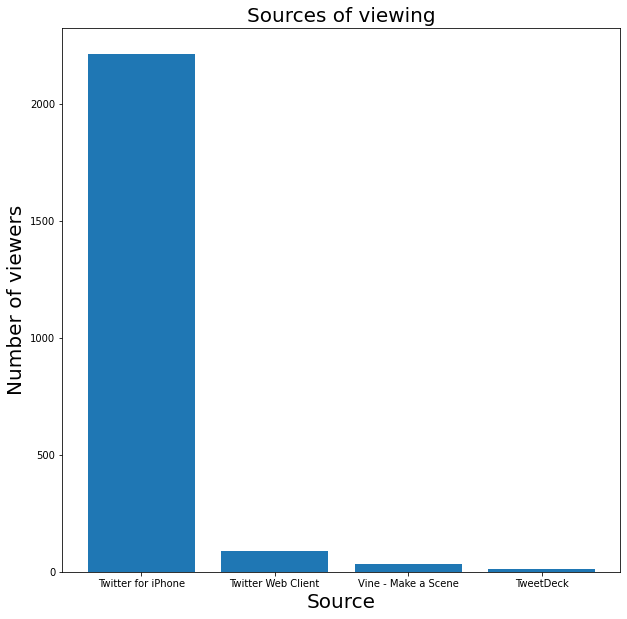

In [60]:
plt.figure(1, figsize= (10,10))
locations = [1, 2, 3, 4]
plt.bar(locations, source, tick_label = labels);
plt.xticks(fontsize = 10 )
plt.title("Sources of viewing", fontsize = 20);
plt.xlabel("Source", fontsize = 20);
plt.ylabel("Number of viewers", fontsize = 20);

### Tweets Daily

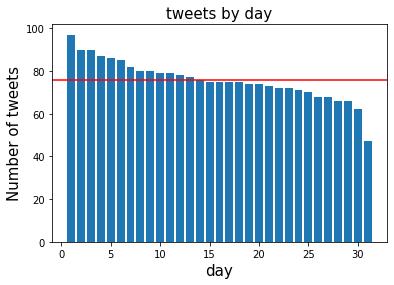

In [61]:
plt.figure(2)
data = df_all_cleaned["timestamp"].apply(lambda x: x.day)
days = data.value_counts()
days_mean = days.values.mean()
plt.bar(range(1,32), days);
plt.title("tweets by day", fontsize = 15)
plt.xlabel("day", fontsize = 15)
plt.ylabel("Number of tweets", fontsize = 15)
plt.axhline(y = days_mean, color ="r");

- The first half of the month is larger than the mean tweets per month "The red line".
- There's a noticable difference between the first day and the last day in the month.

### Retweets Vs Favorites

tweet_id                                                     822872901745569793
in_reply_to_status_id                                                       nan
in_reply_to_user_id                                                         nan
timestamp                                                   2017-01-21 18:26:02
source                                                       Twitter for iPhone
text                          Here's a super supportive puppo participating ...
retweeted_status_id                                                         nan
retweeted_status_user_id                                                    nan
retweeted_status_timestamp                                                  NaT
expanded_urls                 https://twitter.com/dog_rates/status/822872901...
rating_numerator                                                      13.000000
rating_denominator                                                    10.000000
name                                    

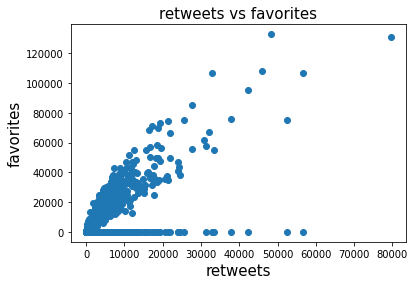

In [82]:
retweets = df_all_cleaned["retweet_count"]
favs = df_all_cleaned["favorite_count"]
plt.title("retweets vs favorites", fontsize = 15)
plt.xlabel("retweets", fontsize = 15)
plt.ylabel("favorites", fontsize = 15)
plt.scatter(retweets, favs);


In [92]:
df_all_cleaned["retweet_count"].sort_values(ascending = False)

1035    79515.0
531     56625.0
260     56625.0
814     52360.0
1074    52360.0
         ...   
113         3.0
1290        2.0
291         0.0
19          NaN
811         NaN
Name: retweet_count, Length: 2349, dtype: float64

In [89]:
df_all_cleaned["favorite_count"].sort_values(ascending = False)

411     132810.0
1035    131075.0
66      107956.0
531     107015.0
135     106827.0
          ...   
775          0.0
790          0.0
558          0.0
19           NaN
811          NaN
Name: favorite_count, Length: 2349, dtype: float64

### Predictions Accuracy

In [63]:
dogs1 = df_all_cleaned["p1"].unique()
print(len(dogs1))
real1 = []
for dog in dogs1:
    real1.append(df_all_cleaned[df_all_cleaned["p1"] == dog]["p1_dog"].sum())
for r in real1:
    if r == False:
        r = 0
real1 = np.array(real1)

379


In [64]:
dogs2 = df_all_cleaned["p2"].unique()
print(len(dogs2))
real2 = []
for dog in dogs2:
    real2.append(df_all_cleaned[df_all_cleaned["p2"] == dog]["p2_dog"].sum())
for r in real2:
    if r == False:
        r = 0
real2 = np.array(real2)

406


In [65]:
dogs3 = df_all_cleaned["p3"].unique()
print(len(dogs3))
real3 = []
for dog in dogs3:
    real3.append(df_all_cleaned[df_all_cleaned["p3"] == dog]["p3_dog"].sum())
for r in real3:
    if r == False:
        r = 0
real3 = np.array(real3)

409


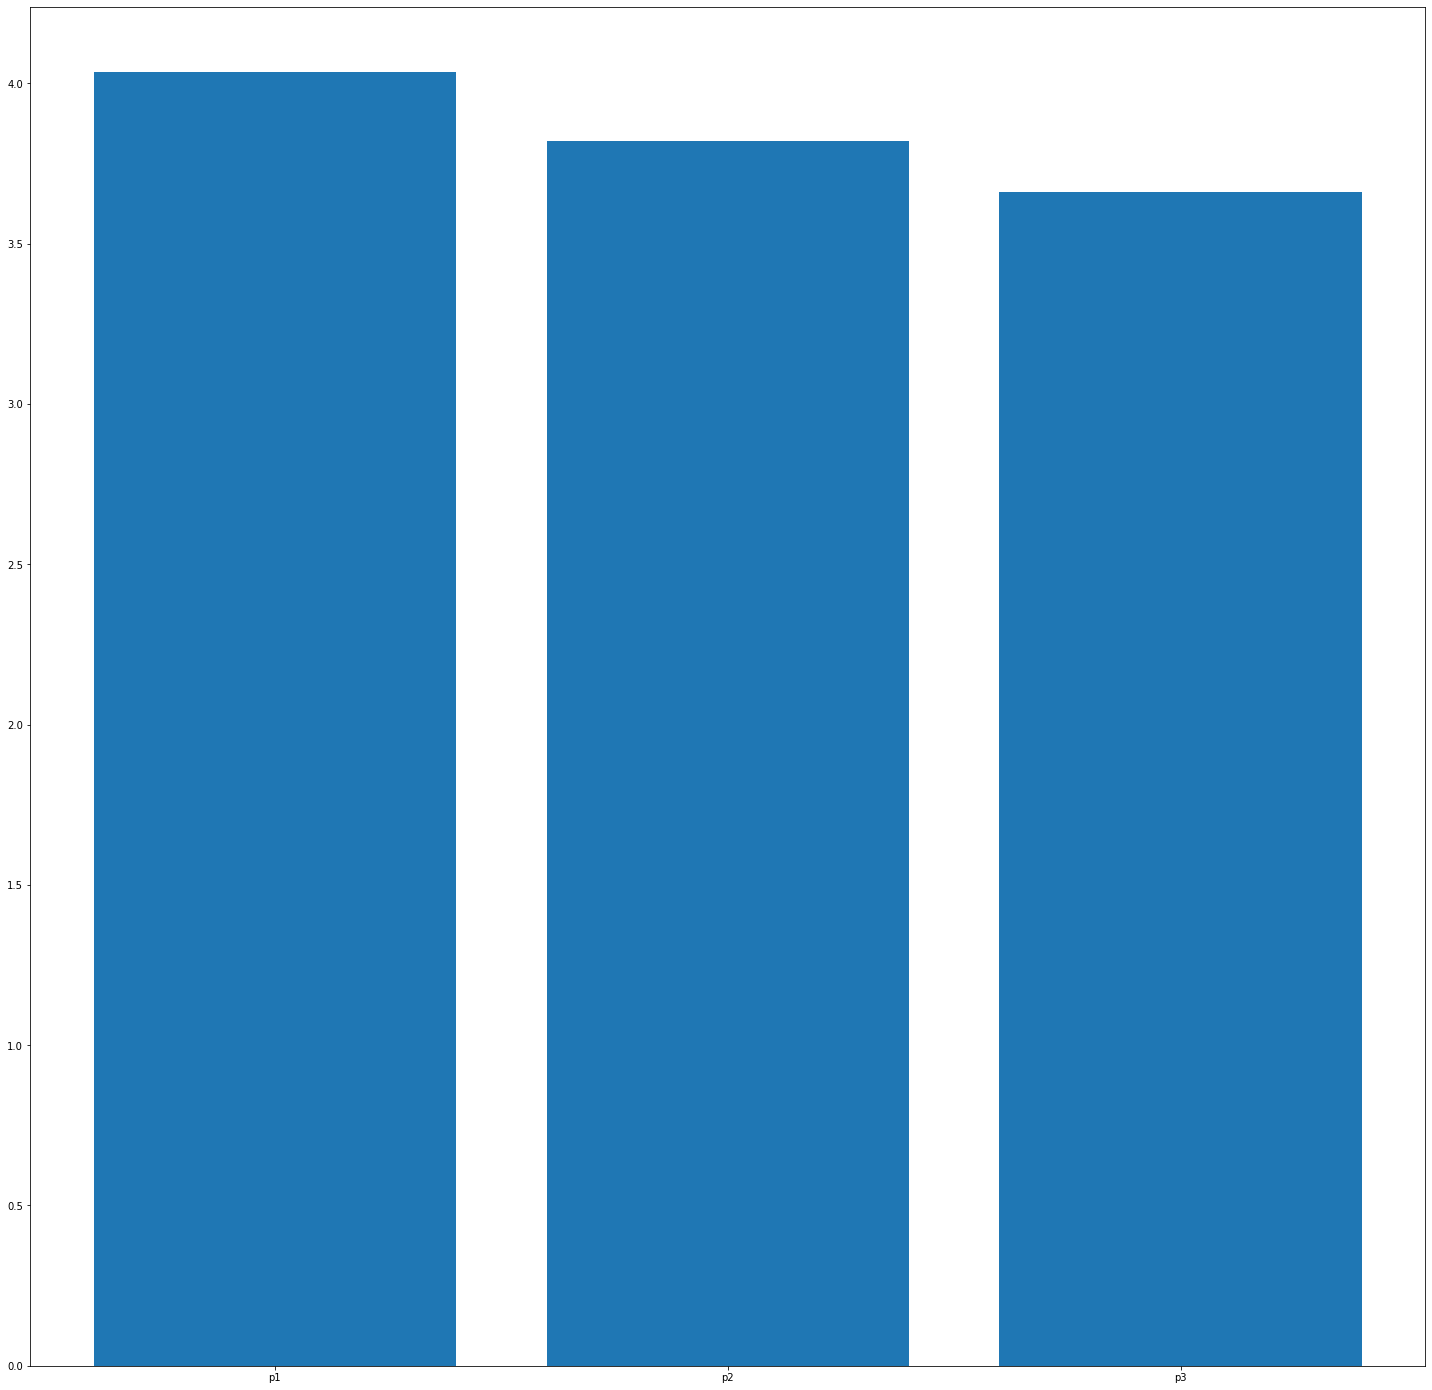

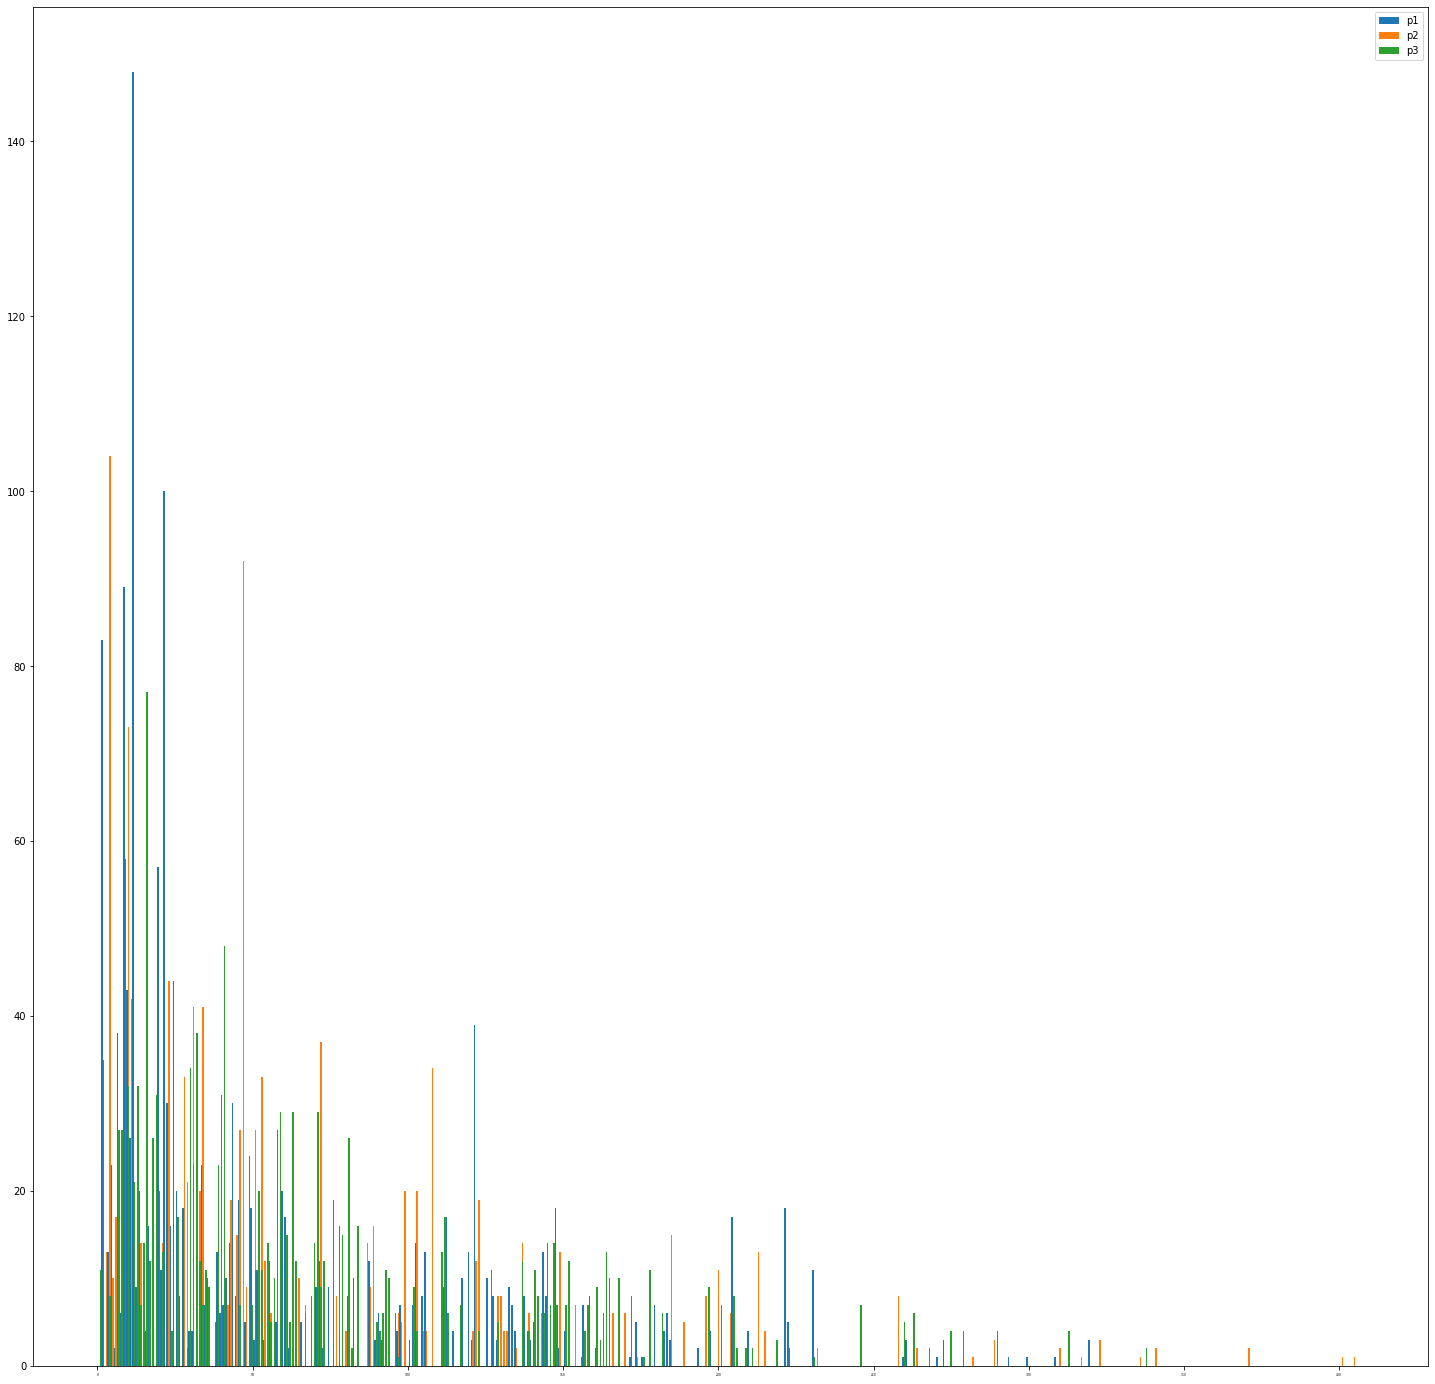

In [66]:
plt.figure(1, figsize = (25,25))
w = 0.5
means = [real1.mean(), real2.mean(), real3.mean()]
locations = [1, 2, 3]
labels = ["p1", "p2", "p3"]
plt.bar(locations, means, tick_label = labels)

plt.figure(2, figsize = (25,25))
plt.bar(np.arange(len(real1))+ w , real1, width = w, label = "p1");
plt.bar(np.arange(len(real2)) + 2 * w , real2, width = w, label = "p2");
plt.bar(np.arange(len(real3)), real3, width = w, label = "p3");
plt.xticks(fontsize = 3);
plt.legend();

The predictions is better in the first image of the tweet as a mean and higher scores